In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import sklearn.datasets as skdatasets
from sklearn.model_selection import train_test_split

# Training a Softmax Linear Classifier

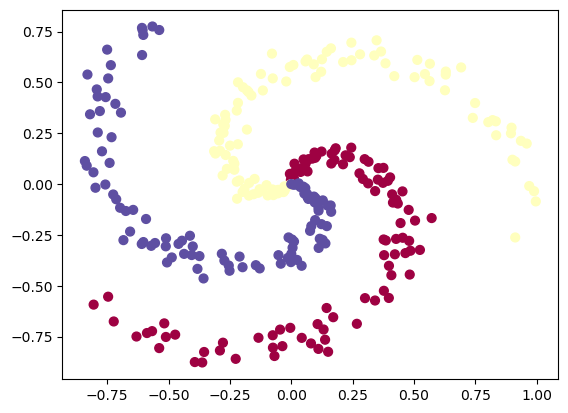

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

scores = np.dot(X, W) + b

num_examples = X.shape[0]
exp_scores = np.exp(scores)
probs = scores / np.sum(exp_scores, axis=1, keepdims=True)

In [4]:
print(scores.shape) 
print(num_examples)
print(exp_scores.shape)
print(probs.shape)

print(range(num_examples))

(300, 3)
300
(300, 3)
(300, 3)
range(0, 300)


In [5]:
reg = 0.01
step_size = 0.01

In [6]:
correct_logprobs = -np.log(probs[range(num_examples), y])

data_loss = np.sum(correct_logprobs) / num_examples

reg_loss = 0.5 * reg * np.sum(W * W)
loss = data_loss + reg_loss

C:\Users\WonResearchGroup\AppData\Local\Temp\ipykernel_14304\272149614.py:1: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(probs[range(num_examples), y])
C:\Users\WonResearchGroup\AppData\Local\Temp\ipykernel_14304\272149614.py:1: RuntimeWarning: invalid value encountered in log
  correct_logprobs = -np.log(probs[range(num_examples), y])


In [7]:
dscores = probs
dscores[range(num_examples), y] -= 1
dscores /= num_examples

dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg * W

W += -step_size * dW
b += -step_size * db 

In [8]:
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1, K))

num_examples = X.shape[0]
for i in range(200):
    # evaluate class scores
    scores = np.dot(X, W) + b

    # compute class probabilities 
    exp_scores = np.exp(scores)
    probs = scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    
    if i % 10 == 0:
        print("iteration %d, loss %f" % (i, loss))
    
    dscores = probs 
    dscores[range(num_examples), y] -= 1 
    dscores /= num_examples

    # backpropagate the gradient to the parameters (W, b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg * W

    W += -step_size * dW
    b += -step_size * db 

iteration 0, loss nan
iteration 10, loss 4.402951
iteration 20, loss 3.781328
iteration 30, loss 3.429656
iteration 40, loss 3.189966
iteration 50, loss 3.011681
iteration 60, loss 2.872064
iteration 70, loss 2.758943
iteration 80, loss 2.665044
iteration 90, loss 2.585680
iteration 100, loss 2.517661
iteration 110, loss 2.458718
iteration 120, loss 2.407186
iteration 130, loss 2.361807
iteration 140, loss 2.321610
iteration 150, loss 2.285830
iteration 160, loss 2.253855
iteration 170, loss 2.225188
iteration 180, loss 2.199423
iteration 190, loss 2.176220


C:\Users\WonResearchGroup\AppData\Local\Temp\ipykernel_14304\444683733.py:13: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(probs[range(num_examples), y])
C:\Users\WonResearchGroup\AppData\Local\Temp\ipykernel_14304\444683733.py:13: RuntimeWarning: invalid value encountered in log
  correct_logprobs = -np.log(probs[range(num_examples), y])


In [9]:
scores = np.dot(X, W) + b 
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y))) 

training accuracy: 0.53


# Training a Neural Network

In [11]:
# One additional hidden layer 

h = 100 
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

step_size = 1e-0   
reg = 1e-3 

num_examples = X.shape[0]

for i in range(10000): 
    # evaluate class scores [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    scores = np.dot(hidden_layer, W2) + b2 
    
    # compute the class probabilities 
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # compute the loss average cross-entropy loss and regularization 
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss 
    if i % 1000 == 0: 
        print("iteration %d: loss %f" %(i, loss))
    
    # compute the gradient on scores 
    dscores = probs 
    dscores[range(num_examples), y] -= 1 
    dscores /= num_examples

    # backpropagate the gradient to the parameters 
    # first backprop into parameters W2 and b2 
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer 
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity 
    dhidden[hidden_layer <= 0] = 0 
    # finally into W, b 
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution 
    dW2 += reg * W2 
    dW += reg * W 

    # perform a parameter update 
    W += -step_size * dW 
    b += -step_size * db
    W2 += -step_size * dW2 
    b2 += -step_size * db2

iteration 0: loss 1.098627
iteration 1000: loss 0.312148
iteration 2000: loss 0.265970
iteration 3000: loss 0.244656
iteration 4000: loss 0.242215
iteration 5000: loss 0.241685
iteration 6000: loss 0.241442
iteration 7000: loss 0.241256
iteration 8000: loss 0.241089
iteration 9000: loss 0.240963


In [12]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2 
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.98


In [13]:
def affine(x, w, b):
    out = None
    out = np.dot(x, w) + b
    cache = (x, w, b)
    return out, cache

def affine_backward(dout, cache):
    x, w, b = cache
    dx, dw, db = None, None, None
    dw = np.dot(x.T, dout)
    db = np.sum(dout, axis=0)
    dx = np.dot(dout, w.T)
    return dx, dw, db

def softmax(x):
    yhat = None
    x = x - np.max(x, axis=1)[:, None]
    yhat = np.exp(x) / np.sum(np.exp(x), axis=1)[:, None]
    return yhat

def one_hot(x, n_class):
	return np.eye(n_class)[x]

def cross_entropy_loss(yhat, y, n_class):
    # clip values to prevent divide by zero
    yhat = np.clip(yhat, a_min=1e-7, a_max=1-1e-7)
    loss = None
    loss = -np.mean(np.sum(np.log(yhat) * one_hot(y, n_class), axis=1))
    return loss

def cross_entropy_loss_and_grad(x, y, n_class):
    yhat = softmax(x)
    loss = cross_entropy_loss(yhat, y, n_class)
    grad = yhat - one_hot(y, n_class)
    return loss, grad